# Multi-class Classification and Neural Network

This assignment is going to be a real fun. Because here we will use one-vs-all Logistic  Regression and Neural network **to recognise hand-written words**. <br />
## 1.1 Multi-Class Classification:
**Problem context:** <br />
>For this exercise, you will use logistic regression and neural networks to
recognize handwritten digits (from 0 to 9). Automated handwritten digit
recognition is widely used today - from recognizing zip codes (postal codes)
on mail envelopes to recognizing amounts written on bank checks. This
exercise will show you how the methods you’ve learned can be used for this
classification task.<br />
In the first part of the exercise, you will extend your previous implemention of logistic regression and apply it to one-vs-all classification.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm   # various work with colormap
import scipy.io       #to use .mat file
from scipy.special import expit
from scipy import optimize
import pandas as pd
from sklearn.linear_model import LogisticRegression

In [2]:
datafile=scipy.io.loadmat('ex3data1.mat')

## 1.2 Visualize Data:
First of all, our file is in .mat format. So we have used scipy.io. Few words about this data: <br />
>"After loading, matrices of the correct dimensions and values will appear in your program’s memory. The matrix
will already be named, so you do not need to assign names to them."

>"There are 5000 training examples in ex3data1.mat, where each training
example is a 20 pixel by 20 pixel grayscale image of the digit. Each pixel is
represented by a floating point number indicating the grayscale intensity at
that location. The 20 by 20 grid of pixels is “unrolled” into a 400-dimensional
vector. Each of these training examples becomes a single row in our data
matrix X. This gives us a 5000 by 400 matrix X where every row is a training
example for a handwritten digit image."


In [3]:
X=datafile['X'] 

>The second part of the training set is a 5000-dimensional vector y that
contains labels for the training set. To make things more compatible with
Octave/MATLAB indexing, where there is no zero index, we have mapped
the digit zero to the value ten. Therefore, a “0” digit is labeled as “10”, while
the digits “1” to “9” are labeled as “1” to “9” in their natural order.

In [4]:
y=datafile['y']

In ex1 and ex2, we have plotted data (x,y) as points. But it is quite different in this case. Here, we have data for an image. If we write our steps in few parts: <br />
* <u>Step 01 </u> <br />
we have to choice a row from X and reshape in (20,20) order matrix. This part is really easy.

* <u>Step 02 </u> <br />
Here we will plot data as image. We have a nice function named **imshow** in matplotlib for that. For details, please have a look [here](https://www.youtube.com/watch?v=HW29067qVWk).

* <u>Step 03 </u> <br />
As the instruction for displayData function, we have to make image like Figure 1 from ex3.pdf. For that we have to know how to plot subplots. We will use **subplots** function.<br />
There is a nice writing about how to plot multiple subplots [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.08-multiple-subplots.html). Hope you will enjoy that.


In [5]:
#code for Visualization
def displayData(row_image_number,column_image_number): #number of images in row and column. It should be greater than 1
    fig,ax= plt.subplots(row_image_number,column_image_number,figsize=(row_image_number,column_image_number))
    for i in range(row_image_number):
        for j in range(column_image_number):
            image_data=X[np.random.randint(X.shape[0])].reshape((20,20),order='F') #according to given data about ex3data1
            ax[i,j].imshow(image_data,cmap = cm.Greys_r)  #make image in grey scale
            ax[i,j].axis('off')
    fig.suptitle('Fig 01: Examples from the dataset')
    return fig   

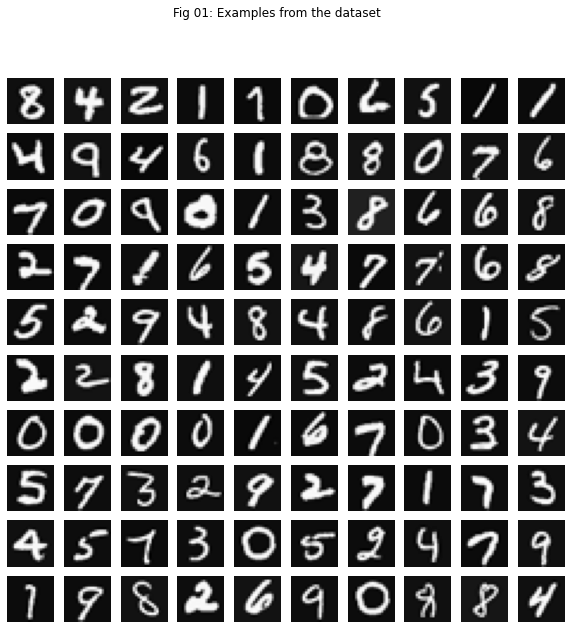

In [6]:
example_image=displayData(10,10)

The game is going to be more exciting. Let's start the next part.

## 1.3 Vectorizing the Logistic Regression

Here we have an exercise to perform vectorization of Logistic regression. But we have done it in ex2. There are both 'unregularized' and 'regularized' part. Now from exercise 2, we know that regularized Logistic regression is more advanced method. So, I'm just going to use only **Regularized Logistic Regression**. Though I will write theory part of both of them here. If anyone interested, she can check the method described in [ex2.](https://github.com/suvranil2/andrew_ng_ml/blob/main/ex2/ex2.ipynb)

### 1.3.1 Matrix form of cost function (Unregularized)
Before doing anything more, I have to make X, Y and $\theta$ matrix. Let's do. <br />
Order of our matrices are: 
 * X $\longrightarrow (n+1) \times m$
 - Y $\longrightarrow 1 \times m$
 - $\Theta \longrightarrow (n+1) \times 1$  <br />  where  n is number of features and m is number of training examples. <br />
Now cost function is:
$\begin{equation}J(\theta)=\frac{1}{m}[Ylog(g(\theta^{T}X))^{T}-(\mathbb{1}-Y)log(\mathbb{1}-g(\theta^{T}X))^{T}]\tag{2}\end{equation}$

**DISCLAIMER:** _$\mathbb{1}$ is not an identity matrix but a column matrix of 1._ <br />
Here, number of training examples m=5000 and number of features n=400

### 1.3.2 Matrix form of gradient descent function (Unregularized)
Logistic gradient descent function form is looks exactly same with Linear gradient descent function. Here, <br />
$\begin{equation}\nabla J(\theta)=\frac{\alpha}{m}X[(g(\theta^{T}X)-Y]^{T}\tag{3}\end{equation}$ where $\alpha$ is learning rate. <br />
So, we will update $\theta$ in this way: 
$\begin{equation}\theta:=\theta-\nabla J(\theta)\tag{4}\end{equation}$

### 1.3.3 Matrix form of  Regularized Logistic Regression
**Matrix form of Cost function** <br />

You know the regularized logistic cost function from the exercise (See 2.3). But we can make a form of that equation also. That $ \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$ ($\lambda$ is regularization parameter) can be written as $\theta^{T}\Lambda\theta$ where  <br />
 
$\begin{equation}\Lambda = \begin{bmatrix} 
    0 &  \\
    & \lambda  \\ 
    & &\ddots & \\
    &    &    & \lambda 
    \end{bmatrix}_{(n+1)\times(n+1)}\tag{5} \end{equation}$  

<br />
  

Now cost function is:
$\begin{equation}J(\theta)=\frac{1}{m}[Ylog(g(\theta^{T}x))^{T}-(\mathbb{1}-Y)log(\mathbb{1}-g(\theta^{T}x))^{T}]+\theta^{T}\Lambda\theta^{T}\tag{6}\end{equation}$

**Matrix form of Cost function** <br />

Regularized Logistic gradient descent function form is looks exactly same with Logistic gradient descent function with an addition. That is, <br />
$\begin{equation}\nabla J(\theta)=\frac{\alpha}{m}X[(g(\theta^{T}X)-Y]^{T}+\frac{1}{m}\Lambda\theta\tag{7}\end{equation}$

So, we will update $\theta$ in this way: 
$\begin{equation}\theta:=\theta-\nabla J(\theta)\tag{8}\end{equation}$


In [7]:
print(X.shape)
print(y.shape)

(5000, 400)
(5000, 1)


#### Control Box:
Here we will keep all important matrices needed for equation (6), (7) and (8). And I know I'm repeating it but it's really necessary: Please keep track of order of matrix. Sometimes it can save us from some errors and a lot of headche.

In [8]:
#control box
n=400        #number of features
m=5000      #number of training examples
x_matrix=np.vstack((np.ones(m),np.matrix(X).T))  # matrix with adding the array of 1

# we will make y_matrix later because for one-vs-all prediction, we have to change it time to time

#for to predict 10 different digits, we have to make one-vs-all prediction 10 times. So, we need 10 set of ...
#(continued) optimized theta values. So just set a 3D nd array.
k=10              #number of one-vs-all prediction

initial_theta_box= np.zeros((k,n+1,1))   #to store intial values of theta
theta_box= np.zeros((k,n+1,1))
#Lambda matrix
lambda_matrix=np.zeros((n+1,n+1))   # (n+1)*(n+1) order matrix
regularization_parameter=1.0    #to control lambda matrix
for i in range (0,n+1,1):
    for j in range (0,n+1,1):
        if i==j and i!=0:
            lambda_matrix[i][j]=regularization_parameter

#identity matrix (this name is a little bit misleading. It's just an matrix with all element 1)
identity_matrix=np.matrix(np.ones(m))

alpha=1.0 #learning rate
iterations=500    #number of iteration

In [9]:
# see the name and you will understand what this is
def regularized_logistic_cost(Theta,X,Y,identity,total_training_example,Lambda):
    sigmoid=expit(np.dot(Theta.T,X))
    cost_1=np.dot(Y,np.log(sigmoid).T)
    cost_2=np.dot((identity-Y),np.log(identity-sigmoid).T)
    additional_part=np.matmul(Theta.T,np.matmul(Lambda,Theta))
    cost=(-cost_1-cost_2)/(total_training_example)+additional_part/(2*total_training_example)
    return cost

In [10]:
def regularized_gradient_descent(X,Y,Theta,identity,learning_rate,iteration,total_training_example,Lambda):
    cost_array=np.zeros(iteration)
    for i in range(0,iteration,1):
        sigmoid=expit(np.dot(Theta.T,X))
        difference=sigmoid-Y
        factor=learning_rate/total_training_example             
        Theta=Theta-factor*np.matmul(X,difference.T)-np.matmul(Lambda,Theta)/total_training_example    
        cost_array[i]=regularized_logistic_cost(Theta,X,Y,identity,total_training_example,Lambda)     # we will plot it to show that it converges with iteration
    return cost_array,Theta  

In [11]:
%%time
for i in range (0,k,1):
    data=i if i else 10
    one_vs_all_y=np.matrix([1 if x==data else 0 for x in y])
    cost=regularized_logistic_cost(initial_theta_box[i],x_matrix,one_vs_all_y,identity_matrix,m,lambda_matrix)
    initial_theta_box[i]=regularized_gradient_descent(x_matrix,one_vs_all_y,initial_theta_box[i],identity_matrix,alpha,iterations,m,lambda_matrix)[1]

CPU times: user 47.3 s, sys: 179 ms, total: 47.4 s
Wall time: 23.8 s


**Result**

In [12]:
X_modified=np.vstack((np.ones(5000),X.T))  #adding bias
result=np.dot(initial_theta_box.reshape(10,401),X_modified).T

**Accuracy**

In [13]:
box=[]
count=0

for i in range (0,m,1):
    if np.argmax(result[i])==0:
        box.append(10)
    else:
        box.append(np.argmax(result[i]))
    if box[i]!=np.ravel(y)[i]:
        count=count+1
    
print('Accuracy is',100-count*100/m)

Accuracy is 92.04


Woooow!!! It is our own digit recognition model. And with 92.04% accuracy1 It was a really exciting journey. <br />

Now for the second part of assignment, we should do **Neural Network Forward Propagation**. Actually it is pretty easy and we can do solve it using elementarty python. If you want to know how we can do it, please check [here](https://github.com/suvranil2/andrew_ng_ml/blob/main/ex3/ex_3_scikit.ipynb). <br />

### CHEERS!!!